In [1]:
pip install pandas numpy tensorflow matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("train.csv")

# Convert pixel strings to arrays
df['pixels'] = df['pixels'].apply(lambda x: np.fromstring(x, sep=' '))

X = np.stack(df['pixels'].values)
X = X.reshape(-1, 48, 48, 1).astype('float32') / 255.0

y = to_categorical(df['emotion'], num_classes=7)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


C:\Users\gaura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 327s 804ms/step - accuracy: 0.2494 - loss: 2.1486 - val_accuracy: 0.2755 - val_loss: 1.8152
Epoch 2/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 398s 983ms/step - accuracy: 0.3651 - loss: 1.6061 - val_accuracy: 0.4187 - val_loss: 1.5178
Epoch 3/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 202s 499ms/step - accuracy: 0.4070 - loss: 1.5018 - val_accuracy: 0.4514 - val_loss: 1.3931
Epoch 4/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 125s 310ms/step - accuracy: 0.4507 - loss: 1.4257 - val_accuracy: 0.4127 - val_loss: 1.4985
Epoch 5/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 163s 404ms/step - accuracy: 0.4608 - loss: 1.3880 - val_accuracy: 0.4270 - val_loss: 1.4878
Epoch 6/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 159s 393ms/step - accuracy: 0.4795 - loss: 1.3416 - val_accuracy: 0.4786 - val_loss: 1.3543
Epoch 7/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 152s 377ms/step - accuracy: 0.4998 - loss: 1.3075 - val_accuracy: 0.5246 - val_loss: 1.2501
Epoch 8/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 141s 349ms/step - accuracy: 0.5045 -

In [5]:
model.save("emotion_model.h5")

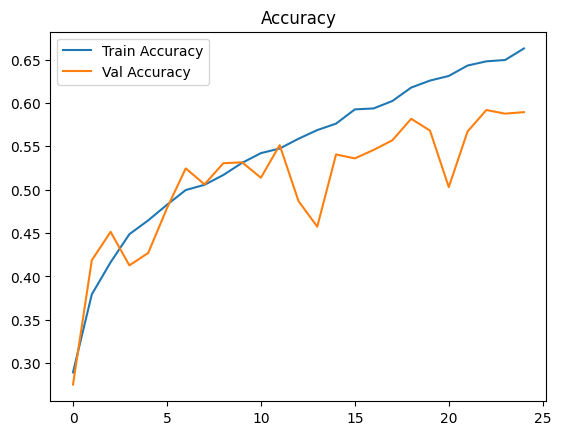

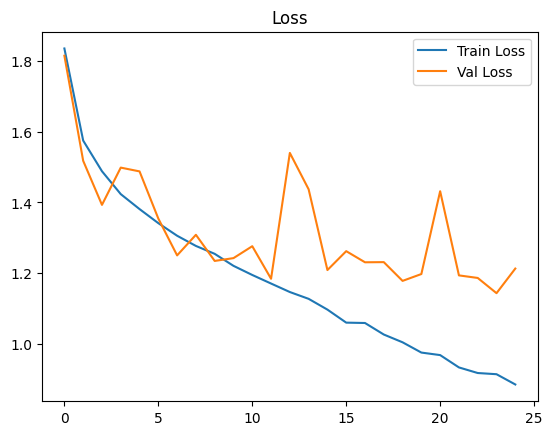

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()
